LSTM using BERT Vectors

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = "/content/drive/My Drive/Twitter Depression - Results/encoded_vectors_with_labels.csv"

# Copy the file to Colab under the /content directory
!cp "{file_path}" /content

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv("/content/encoded_vectors_with_labels.csv")

# Display the DataFrame
print(df.head())

Mounted at /content/drive
          0         1         2         3         4         5         6  \
0  0.098470  0.052669  0.520149 -0.230414 -0.367453 -0.687132  0.196090   
1  0.167706  0.158618  0.323210 -0.373219 -0.197652 -0.275584  0.415468   
2  0.166042  0.161448 -0.142639 -0.247362 -0.446545 -0.290733  0.547275   
3  0.040390  0.049253 -0.142405 -0.247114 -0.444034 -0.000014  0.445511   
4  0.171564  0.386163 -0.125235 -0.537803 -0.277364 -0.607069  0.161100   

          7         8         9  ...       759       760       761       762  \
0  0.687700  0.192767 -0.431523  ... -0.210688 -0.124198 -0.475028  0.306583   
1  0.763598  0.235065 -0.775223  ... -0.268773 -0.152770 -0.064545  0.169043   
2  0.462410  0.322406 -0.344267  ... -0.221927  0.144284 -0.274054  0.028372   
3  0.537829 -0.059666 -0.109303  ... -0.179580  0.032487 -0.067414  0.109922   
4  0.388794  0.137294 -0.370536  ... -0.143802  0.337286 -0.350879  0.307393   

        763       764       765       766 

In [ ]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.5184 - loss: 0.6920 - val_accuracy: 0.5598 - val_loss: 0.6876
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.5405 - loss: 0.6886 - val_accuracy: 0.5527 - val_loss: 0.6844
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5317 - loss: 0.6884 - val_accuracy: 0.5426 - val_loss: 0.6889
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.5452 - loss: 0.6846 - val_accuracy: 0.5691 - val_loss: 0.6828
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5580 - loss: 0.6847 - val_accuracy: 0.5680 - val_loss: 0.6821
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.5537 - loss: 0.6845 - val_accuracy: 0.5867 - val_loss: 0.6776
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5524 - loss: 0.6849 - val_accuracy: 0.5887 - val_loss: 0.6766
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5599 - loss: 0.6831 - 

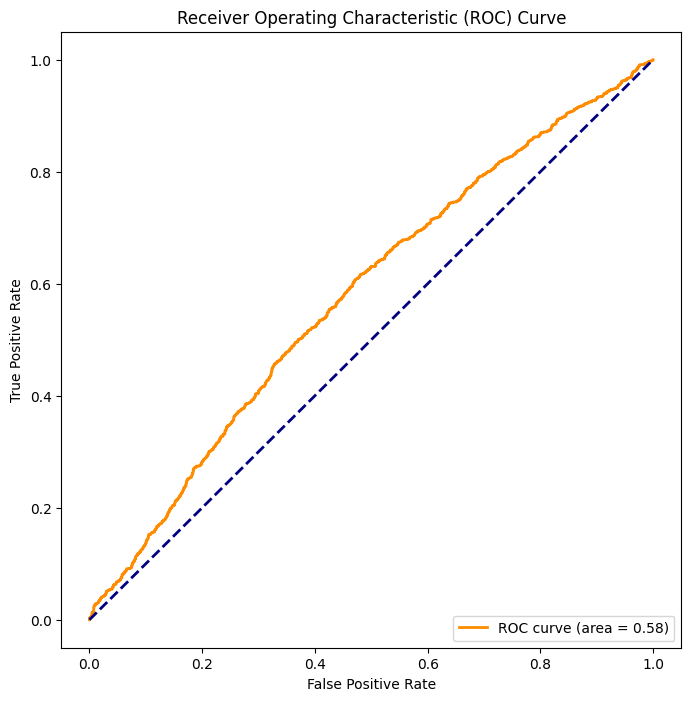

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.04      0.07      1610
           1       0.50      0.97      0.66      1590

    accuracy                           0.50      3200
   macro avg       0.53      0.50      0.37      3200
weighted avg       0.53      0.50      0.36      3200



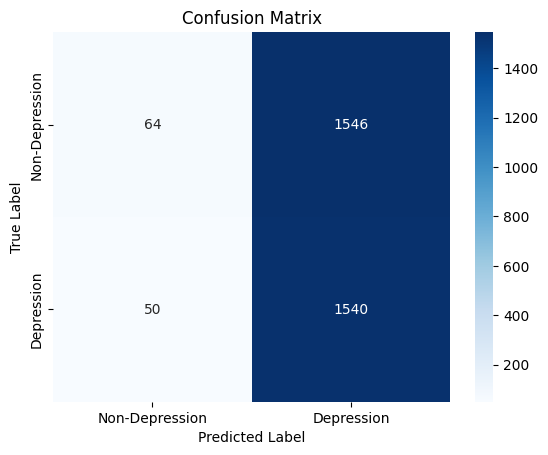

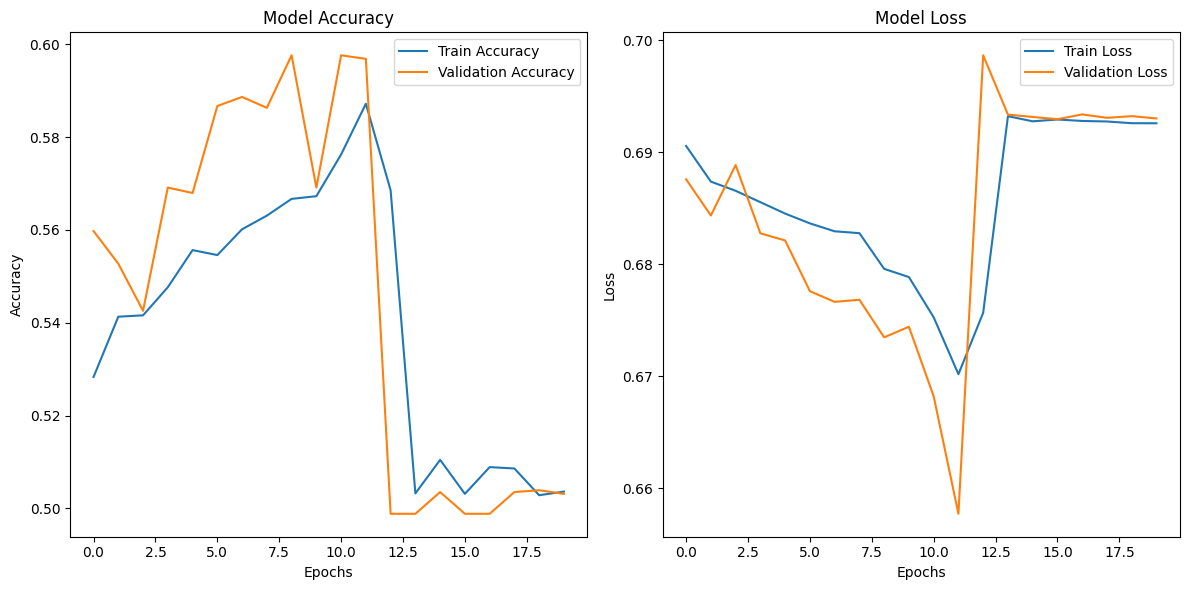

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the dataset
file_path = 'encoded_vectors_with_labels.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Preprocess the data
X = df.iloc[:, :-1].values  # Features are all columns except the last one (BERT-encoded vectors)
y = df['label'].values  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the test set
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depression', 'Depression'], yticklabels=['Non-Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Plot training history (accuracy and loss curves)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

LSTM using Word2Vec

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = "/content/drive/My Drive/Twitter Depression - Results/Mental-Health-Twitter.csv"

# Copy the file to Colab under the /content directory
!cp "{file_path}" /content

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv("/content/Mental-Health-Twitter.csv")

# Display the DataFrame
print(df.head())

Mounted at /content/drive
   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6877 - loss: 0.5712 - val_accuracy: 0.5560 - val_loss: 0.8206 - learning_rate: 0.0010
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8486 - loss: 0.3130 - val_accuracy: 0.5577 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8673 - loss: 0.2782 - val_accuracy: 0.6793 - val_loss: 0.6812 - learning_rate: 0.0010
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8676 - loss: 0.2716 - val_accuracy: 0.5228 - val_loss: 0.9501 - learning_rate: 0.0010
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8819 - loss: 0.2568 - val_accuracy: 0.4190 - val_loss: 1.0731 - learning_rate: 0.0010
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8918 - loss: 0.2372 - val_accuracy: 0.5838 - val_loss: 0.9898 - learning_rate: 0.0010
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8972 - loss: 0.

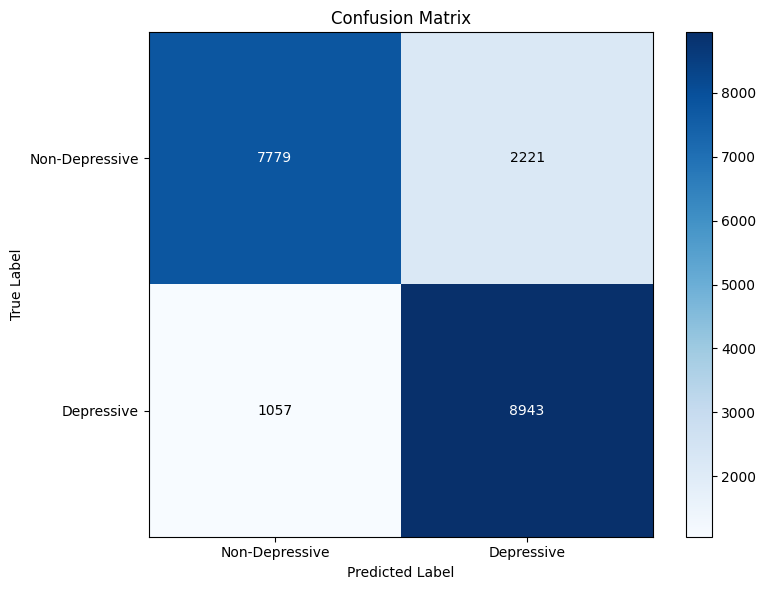

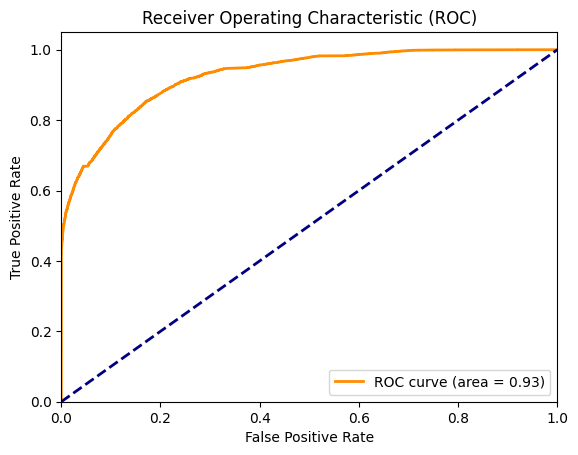

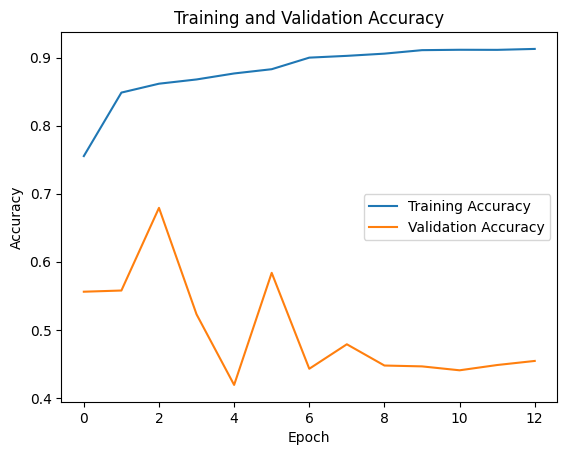

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPool1D
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("/content/Mental-Health-Twitter.csv")

# Drop rows with missing or NaN labels
data = data.dropna(subset=['label'])

# Drop rows with missing or NaN text
data = data.dropna(subset=['post_text'])

texts = data["post_text"].astype(str).tolist()
labels = data["label"].values

# Tokenize the texts and create sequences
max_sequence_length = 100  # Adjust based on your data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # what type of encoding is used ?
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=max_sequence_length)

# Define the model
model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=max_sequence_length),
    Bidirectional(LSTM(32, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback with increased patience
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define ReduceLROnPlateau callback for reducing learning rate when the validation loss stops improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with 30 epochs and callbacks
batch_size = 64  # Experiment with different batch sizes
history = model.fit(padded_sequences, labels, epochs=30, batch_size=batch_size, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Now let's evaluate the model
y_true = labels
y_pred = model.predict(padded_sequences)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Calculate AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate F1-score
f1 = classification_report(y_true, y_pred_binary, target_names=["Non-Depressive", "Depressive"])

# Print evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAUC-ROC Curve:")
print(f"AUC = {roc_auc:.4f}")
print("\nF1-Score:")
print(f1)

# Save the confusion matrix as an image with annotations
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add annotations to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

# Add labels and titles
plt.xticks([0, 1], ["Non-Depressive", "Depressive"])
plt.yticks([0, 1], ["Non-Depressive", "Depressive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Save the AUC-ROC curve as an image
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')

# Optionally, you can also save the training history plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_history.png')
